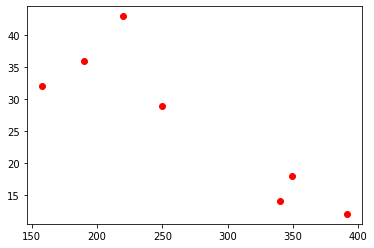

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

x = np.array([158, 250, 340, 349, 391, 190, 220])
y = np.array([32, 29, 14, 18, 12, 36, 43])

plt.scatter(x, y, marker='o', color='r')

In [2]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"slope: {round(slope, 3)}")
print(f'y-intercept: {round(intercept, 3)}')
print(f'correlation coefficient: {round(r_value, 4)}')

slope: -0.117
y-intercept: 57.89
correlation coefficient: -0.8789


In [5]:
# 25 = -0.117*x + 57.89
print(f"A vehicle with 25 mpg is expected to have {round((25 - 57.89)/-0.117)}hp")

A vehicle with 25 mpg is expected to have 281hp


In [7]:
import sympy as sym
x,y,z = sym.symbols("x,y,z")
sym.solve([
    x + y + z - 44500,
    z - y + 3000,
    x*0.04 + y*0.05 + z*0.06 - 2110
]
, [x,y,z])

{x: 21500.0000000000, y: 13000.0000000000, z: 10000.0000000000}

In [8]:
from pulp import LpVariable, LpProblem, LpMaximize, LpMinimize, LpStatus, value

# Declare variables
x = LpVariable('x', 0, None)
y = LpVariable('y', 0, None)


# define the problem
prob = LpProblem("problem", LpMaximize)

# defines the constraints

prob += x <= 52
prob += y <= 83
prob += x + y <= 100
prob += x*2.40 + y*0.80 <= 142

# defines the objective function to minimize
prob += 0.038*x + 0.031*y

# solve the problem
status = prob.solve()
LpStatus[status]

for var in [x, y]:
    print(f"{var}: {value(var)}")
print(f"optimum: {value(x)*0.038 + value(y)*0.031}")

x: 38.75
y: 61.25
optimum: 3.37125


In [18]:
# It makes more sense to round x up to 39 and y down to 61 (because x has more fat content)
# but that would put us over the total cost constraint (39*2.40 + 61*0.80 = 142.4) 
# Something similar happens when rounding x to 38 and y to 62 (38*2.40 + 62*0.80 = 140.8)
# So round both down
print(f"Max amount of butter fat: {round(0.038*38 + 0.031*61, 2)}")

Max amount of butter fat: 3.33


In [24]:
from sympy import *
from sympy.abc import *

A = 525*exp(-.33*t)
A

525*exp(-0.33*t)

In [22]:
round(A.diff(t).subs(t, 3), 2)

-64.38

In [25]:
round(A.diff(t).subs(t, 7), 2)

-17.20

In [41]:
print(A.diff(t).subs(t, 0.001))
print(A.diff(t).subs(t, 0.9))
print(A.diff(t).subs(t, 1))
print(A.diff(t).subs(t, 1.1))
print(A.diff(t).subs(t, oo))

-173.192836932425
-128.732375141706
-124.553536817081
-120.510349603718
0


In [26]:
A.subs(t, oo)

0

------ Analysis for: (t**2 + 25)/(2*t) ------
Critical numbers:
(5.0, 5.0)
Interval ends are:
(1, 13)
(12, 169/24)
Max/Min Points:
Max point: (1.0, 13.0)
Min point: (5.0, 5.0)


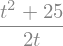

In [55]:
def full_simplify(expr):
    cur = expr
    while True:
        nxt = simplify(cur)
        if cur == nxt:
            return cur
        cur = nxt
        
def analyze_function(f, x, interval=[]):
    init_printing()
    d_f = diff(f, x, 1)
    critical_numbers = solve(d_f, x)
    print(f"------ Analysis for: {f} ------")
    max_point = (None, -2**64)
    min_point = (None, 2**64)
    print("Critical numbers:")
    for cn in critical_numbers:
        if not cn.is_real:
            continue
        if interval and cn > max(interval):
            continue
        if interval and cn < min(interval):
            continue
        point = (cn, f.subs(x, cn))
        max_point = max(max_point, point, key=lambda p: p[1])
        min_point = min(min_point, point, key=lambda p: p[1])
        print(f"{tuple(map(float, point))}")
   
    print("Interval ends are:")
    for n in interval:
        point = (n, (f.subs(x, n) if n is not oo else n))
        print(f"{point}")
        max_point = max(max_point, point, key=lambda p: p[1])
        min_point = min(min_point, point, key=lambda p: p[1])

    if max_point[0] != None or min_point[0] != None:
        print("Max/Min Points:")
        max_point[0] != None and print(f"Max point: {tuple(map(float, max_point))}")
        min_point[0] != None and print(f"Min point: {tuple(map(float, min_point))}")
    return full_simplify(f), full_simplify(d_f)


M = (pow(t, 2) + 25)/(2*t)
analyze_function(M, t, [1, 12])
M

In [45]:
f = 40.5 + 3.4*x - 0.891*pow(x, 2)
f

In [46]:
integrate(f, (x, 0, 9))

In [49]:
def lagrange_optimize(f, g, vs):
    lam = Symbol('lam')
    eqs = [g]
    for v in vs:
        eqs.append(f.diff(v) - lam * g.diff(v))
    sls = solve(eqs)
    solutions = sls if type(sls) == list else [sls]
    print("Solutions:")
    for s in solutions:
        real_values = list(filter(lambda k: k.is_real, map(lambda u: s[u], vs)))
        if len(real_values) != len(vs):
            continue
        print("f(", end='')
        params = ''
        for v in vs:
            params += f"{s[v]},"
        print(params.strip(','), end='')
        print(") = ", end='')

        point = f
        for v in vs:
            point = point.subs(v, s[v])
        print(point)
        
P = -pow(x, 2) - pow(y, 2) + 2*x +6*y
g = x + y - 4
lagrange_optimize(P, g, [x, y])

Solutions:
f(1,3) = 10


In [50]:
lam = 75
expon = lambda l, x: (1/l)*exp((1/-l)*x) 
expon(lam, t)

In [53]:
# Using sympy integration
print(f"P(X <= 56) = {round(integrate(expon(lam, t), (t, 0, 56)), 4)}")
print(f"P(X >= 497) = {round(integrate(expon(lam, t), (t, 497, oo)), 4)}")

P(X <= 56) = 0.5261
P(X >= 497) = 0.0013
